In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style and display options for better readability
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)


In [4]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv.crdownload')

In [5]:
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
display(df.head())
print("\nData Types and Missing Values:")
df.info()
print("\nDescriptive Statistics:")
display(df.describe())


Dataset Shape: (1043, 21)

First 5 Rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1043 non-null   object 
 1   gender            1043 non-null   object 
 2   SeniorCitizen     1043 non-null   int64  
 3   Partner           1043 non-null   object 
 4   Dependents        1043 non-null   object 
 5   tenure            1043 non-null   int64  
 6   PhoneService      1043 non-null   object 
 7   MultipleLines     1043 non-null   object 
 8   InternetService   1043 non-null   object 
 9   OnlineSecurity    1043 non-null   object 
 10  OnlineBackup      1043 non-null   object 
 11  DeviceProtection  1043 non-null   object 
 12  TechSupport       1043 non-null   object 
 13  StreamingTV       1042 non-null   object 
 14  StreamingMovies   1042 non-null   object 
 15  Contract          1042 non-null   object 
 16  PaperlessB

,SeniorCitizen,tenure,MonthlyCharges
count,1043.000000,1043.000000,1042.000000
mean,0.165868,32.138063,66.497793
std,0.372140,24.759924,29.837688
min,0.000000,0.000000,18.950000
25%,0.000000,8.000000,42.662500
50%,0.000000,29.000000,74.225000
75%,0.000000,56.000000,90.050000
max,1.000000,72.000000,116.250000


In [6]:
# Temporarily convert TotalCharges to numeric, coercing errors to NaN (Not a Number)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# We'll handle the resulting NaNs properly tomorrow, but for now, we can see how many there are.
print(f"Number of missing TotalCharges: {df['TotalCharges'].isnull().sum()}")

Number of missing TotalCharges: 4


Churn Rate:
Churn
No     74.184261
Yes    25.815739
Name: proportion, dtype: float64


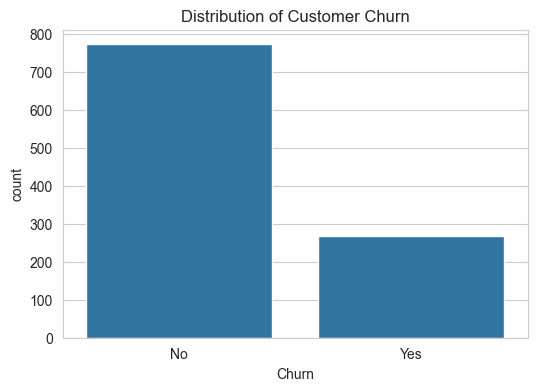

In [7]:
# Calculate and print the churn rate
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(f"Churn Rate:\n{churn_rate}")

# Visualize the churn rate
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Customer Churn')
plt.show()

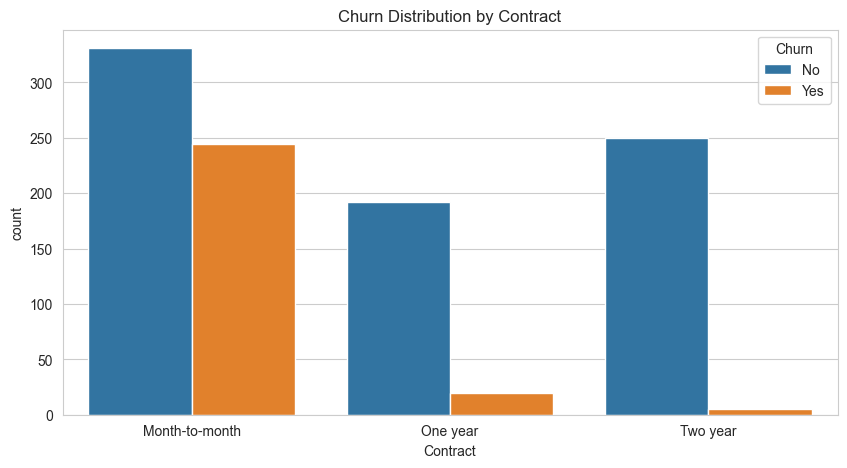

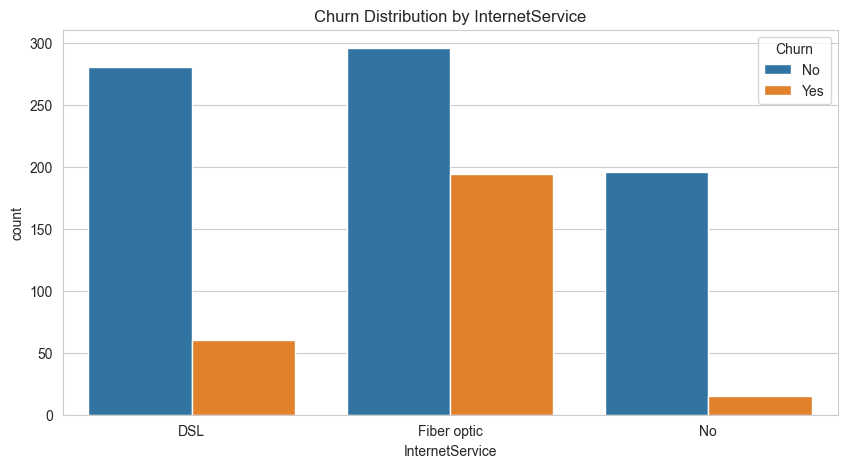

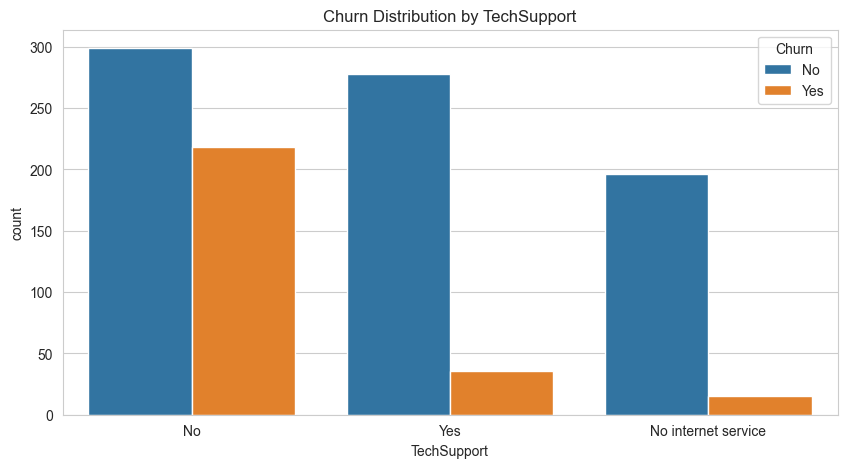

In [8]:
# Function to make plotting easier
def plot_churn_by_category(feature):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Churn Distribution by {feature}')
    plt.show()

# Generate plots for the most likely churn drivers
plot_churn_by_category('Contract')
plot_churn_by_category('InternetService')
plot_churn_by_category('TechSupport')
